In [1]:
from netCDF4 import Dataset
from netCDF4 import num2date
nc = Dataset('http://glos.staging.asascience.com:8080/thredds/dodsC/habs_prod//lakes/ysi_turbidity/tollsps/tollsps.ncml', 'r')

In [2]:
times = nc.variables['time'][:]
dates = num2date(times, units='seconds since 1970-01-01')

In [3]:
dates

array([datetime.datetime(2015, 3, 16, 0, 0),
       datetime.datetime(2015, 3, 16, 0, 10),
       datetime.datetime(2015, 3, 16, 0, 20), ...,
       datetime.datetime(2015, 3, 23, 14, 30),
       datetime.datetime(2015, 3, 23, 14, 40),
       datetime.datetime(2015, 3, 23, 14, 50)], dtype=object)

In [4]:
dates.shape

(1082,)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


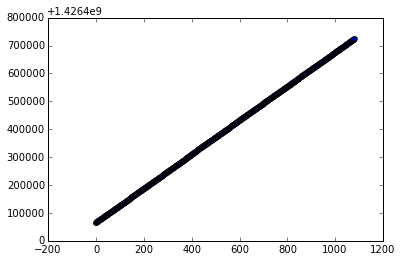

In [6]:
import matplotlib.pyplot as plt
plt.scatter(range(times.shape[0]), times)

In [7]:
import glob

In [8]:
list(glob.glob('/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/*.nc'))

['/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/tollsps_sea_surface_water_temperature_2015075.nc',
 '/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/tollsps_sea_surface_water_temperature_2015076.nc',
 '/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/tollsps_sea_surface_water_temperature_2015077.nc',
 '/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/tollsps_sea_surface_water_temperature_2015078.nc',
 '/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/tollsps_sea_surface_water_temperature_2015079.nc',
 '/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/tollsps_sea_surface_water_temperature_2015080.nc',
 '/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_tempe

In [9]:
from netCDF4 import num2date
num2date(times[0], units='seconds since 1970-01-01')

datetime.datetime(2015, 3, 16, 0, 0)

In [10]:
for nc_file in glob.glob('/Users/lcampbell/Documents/Datasets/GLOS/HABS-PROD/lakes/sea_surface_water_temperature/tollsps/2015/*.nc'):
    with Dataset(nc_file, 'r+') as nc:
        time_var = nc.variables['time']
        start_time = time_var[0]
        end_time = time_var[-1]
        start_dtg = num2date(start_time, units=time_var.units)
        end_dtg = num2date(end_time, units=time_var.units)
        start_iso = start_dtg.isoformat()
        end_iso = end_dtg.isoformat()
        nc.time_coverage_start = start_iso
        nc.time_coverage_end = end_iso
        

In [11]:
url = 'http://tds.glos.us/thredds/dodsC/glos/habs/lakes/ph/tollsps/tollsps.ncml'
nc = Dataset(url,'r')

In [12]:
nc.dimensions

OrderedDict([(u'height', <type 'netCDF4.Dimension'>: name = 'height', size = 1
), (u'maxStrlen64', <type 'netCDF4.Dimension'>: name = 'maxStrlen64', size = 64
), (u'time', <type 'netCDF4.Dimension'>: name = 'time', size = 1508
)])

In [13]:
nc.variables['time'][:]

IndexError: 